First, let's read in the original dataset and the (modified) data we prepared in weeks 8-9:

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'Healthcare_dataset.csv', engine='python') #original_dataset
df_modified=pd.read_csv(r'df_modified.csv', engine='python') #cleaned dataset

In [2]:
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


We found the 6 best variables during weeks 8-9. We also include the target variable (Persistency_Flag_Persistent) here:

In [3]:
data_best = [df_modified["Dexa_During_Rx_Y"] , df_modified["Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y"], df_modified["Comorb_Encounter_For_Immunization_Y"] , df_modified["Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y"] , df_modified["Comorb_Long_Term_Current_Drug_Therapy_Y"] , df_modified["Concom_Viral_Vaccines_Y"], df_modified["Persistency_Flag_Persistent"]]

In [4]:
headers = ["Dexa_During_Rx_Y" , "Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y", "Comorb_Encounter_For_Immunization_Y" ,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y" , "Comorb_Long_Term_Current_Drug_Therapy_Y" , "Concom_Viral_Vaccines_Y", "Persistency_Flag_Persistent"]

Let's create a dataframe the best data available data (top 7 features and the target variable)

In [5]:
df_best=pd.concat(data_best, axis=1, keys=headers)

In [6]:
df_best.shape

(1215, 7)

Let's check the original dataset for the averages of the numerical variables grouped by the persistency labels:

In [7]:
group=df.groupby("Persistency_Flag")["Count_Of_Risks"].mean()

In [8]:
print(group)

Persistency_Flag
Non-Persistent    1.169555
Persistent        1.355314
Name: Count_Of_Risks, dtype: float64


Let's restructure the data for plotting:

In [9]:
data1=[[0, 1.17],
       [1,1.36]]
cols=["Persistency_Flag","Count_Of_Risks"]

df_for_plot=pd.DataFrame(data1,columns=cols)

Let's create a plot to visualise this:

Text(0.5, 1.05, 'Average count of risks for each Persistency_Flag group, using original dataset')

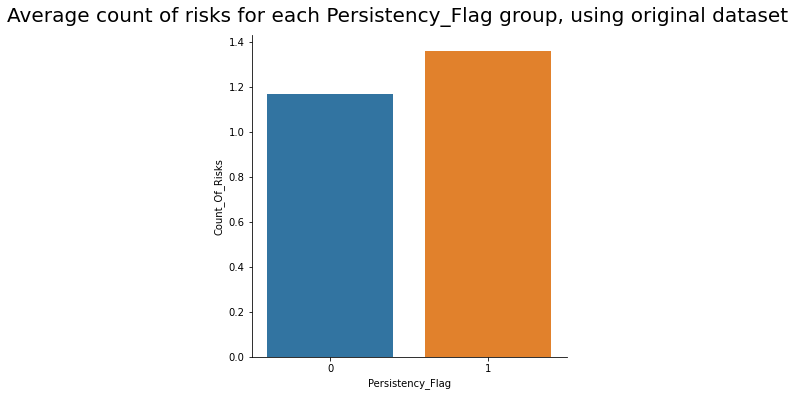

In [10]:
import seaborn as sns

Pf_CoR_plot=sns.catplot(x = "Persistency_Flag",       # x variable name
            y = "Count_Of_Risks",       # y variable name
            data=df_for_plot,
             # group variable name
            kind = "bar",
                   legend=False)

Pf_CoR_plot.fig.suptitle('Average count of risks for each Persistency_Flag group, using original dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)



The average Count_Of_Risks is slightly higher for people who were persistent 

In [11]:
group=df.groupby("Persistency_Flag")["Dexa_Freq_During_Rx"].mean()

In [12]:
group

Persistency_Flag
Non-Persistent    0.896956
Persistent        6.525989
Name: Dexa_Freq_During_Rx, dtype: float64

In [13]:
group=df_modified.groupby("Persistency_Flag_Persistent")["Dexa_Freq_During_Rx"].mean()

In [14]:
group

Persistency_Flag_Persistent
0.0    0.004066
1.0    0.035336
Name: Dexa_Freq_During_Rx, dtype: float64

In [15]:
data1=[[0, 0.90],
       [1,6.53]]
cols=["Persistency_Flag","Dexa_Freq_During_Rx"]

df_for_plot=pd.DataFrame(data1,columns=cols)

Text(0.5, 1.05, 'Average Dexa_Freq_During_Rx for each Persistency_Flag group, using original dataset')

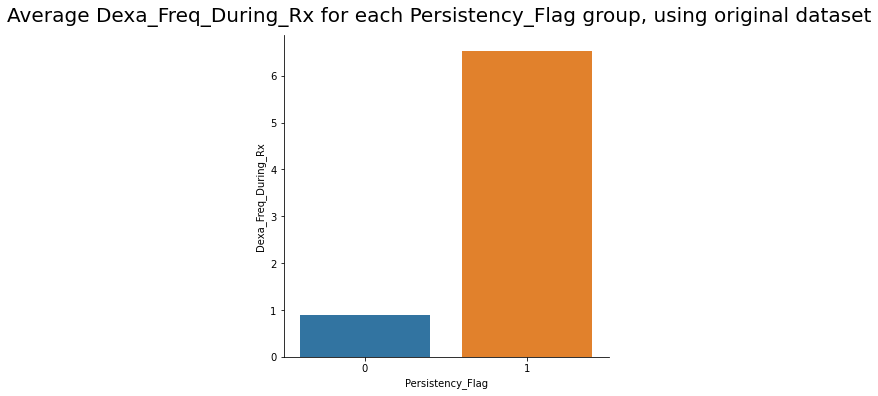

In [16]:

Ps_Df_plot=sns.catplot(x = "Persistency_Flag",       
            y = "Dexa_Freq_During_Rx",     
            data=df_for_plot,
            
            kind = "bar",
                   legend=False)

Ps_Df_plot.fig.suptitle('Average Dexa_Freq_During_Rx for each Persistency_Flag group, using original dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)

Average dexa_freq_during_rx was much higher for the persistent class, but there were a lot of outliers for this variable before they were removed

For both the numerical variables, the persistent group had much higher values on average. 

Let's explore the relationship between the numerical variables:


Text(0.5, 1.0, 'Count_Of_Risks against Dexa_Freq_During_Rx, using original dataset')

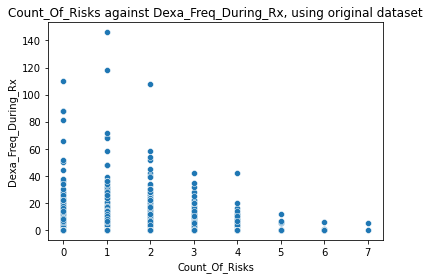

In [17]:
Count_Dexa_lineplot=sns.scatterplot(x='Count_Of_Risks', y='Dexa_Freq_During_Rx', data=df)
#Count_Dexa_lineplot.set(xlabel='Count_Of_Risks')
Count_Dexa_lineplot.set_title('Count_Of_Risks against Dexa_Freq_During_Rx, using original dataset')
#Count_Dexa_lineplot.fig.suptitle(' ', fontsize=18, fontdict={"weight": "bold"})

The Dexa_Freq_During_Rx tends to decrease as the value of Count_Of_Risks increases.

Let's investigate the relationships between the best variables and the target:

ones(1s) are truth values of the binary variables, and zeroes(0s) represent false, so we can sum the columns to find the total numbers of truth values.

In [18]:
sum_df = df_best.groupby(["Persistency_Flag_Persistent"]).sum().reset_index()

In [19]:
sum_df

,Persistency_Flag_Persistent,Dexa_During_Rx_Y,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y,Comorb_Encounter_For_Immunization_Y,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y",Comorb_Long_Term_Current_Drug_Therapy_Y,Concom_Viral_Vaccines_Y
0,0.0,71.0,298.0,271.0,233.0,68.0,34.0
1,1.0,195.0,258.0,256.0,221.0,136.0,78.0


Let's restructure the data for plotting. We use abbreviated feature names here:

In [20]:
data=[[#"Dexa_During_Rx_Y"
    "DDR", 71, 0],
[#"Dexa_During_Rx_Y"
    "DDR", 195, 1],
[#"Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y"
"CEFSFMN", 298, 0],
[#"Comorb_Encounter_For_Screening_For_Malignant_Neoplasms_Y"
   "CEFSFMN" , 258, 1],          
[#"Comorb_Encounter_For_Immunization_Y"
 "CEFM", 271, 0],
[#"Comorb_Encounter_For_Immunization_Y"
    "CEFM", 256, 1],          
[#"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y"
    "CEFGEWOCSORD", 233, 0],
[#"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx_Y"
    "CEFGEWOCSORD", 221, 1],
[#"Comorb_Long_Term_Current_Drug_Therapy_Y"
    "CLTCDT", 68, 0],
[#"Comorb_Long_Term_Current_Drug_Therapy_Y"
    "CLTCDT", 136, 1],
[#"Concom_Viral_Vaccines_Y"
   "CVV" , 34, 0],
[#"Concom_Viral_Vaccines_Y"
    "CVV", 78, 1]]



data_df=pd.DataFrame(data)
data_df.columns=["Features","Count_Of_Ones","Persistency_Flag_Persistent"]
data_df


,Features,Count_Of_Ones,Persistency_Flag_Persistent
0,DDR,71,0
1,DDR,195,1
2,CEFSFMN,298,0
3,CEFSFMN,258,1
4,CEFM,271,0
5,CEFM,256,1
6,CEFGEWOCSORD,233,0
7,CEFGEWOCSORD,221,1
8,CLTCDT,68,0
9,CLTCDT,136,1


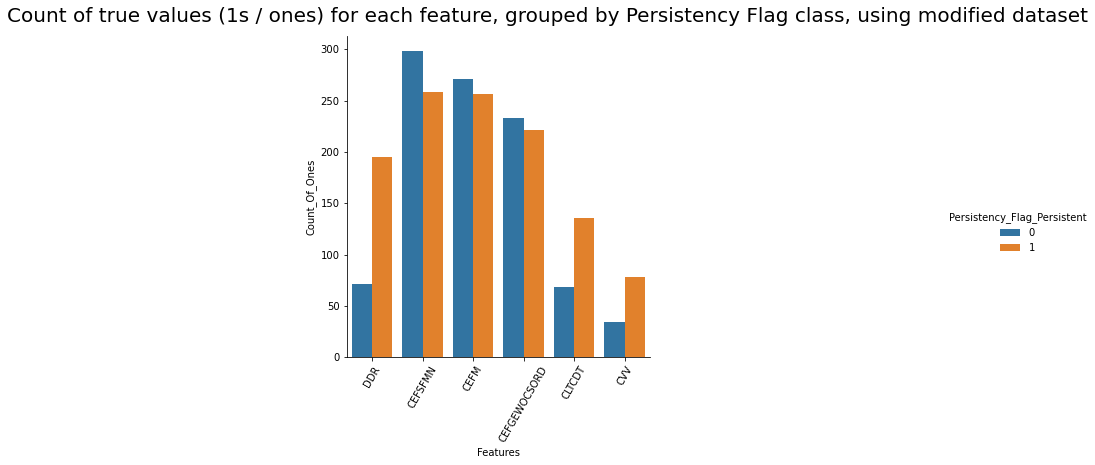

In [21]:
Ps_Features_plot=sns.catplot(x = "Features",     
            y = "Count_Of_Ones",       
            data=data_df,
            hue="Persistency_Flag_Persistent",            
            kind = "bar")

Ps_Features_plot.fig.suptitle('Count of true values (1s / ones) for each feature, grouped by Persistency Flag class, using modified dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)

for ax in Ps_Features_plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(60)

Let's explore Gender:

Text(0.5, 1.05, 'Count of male and female patients, grouped by persistency flag, using original dataset')

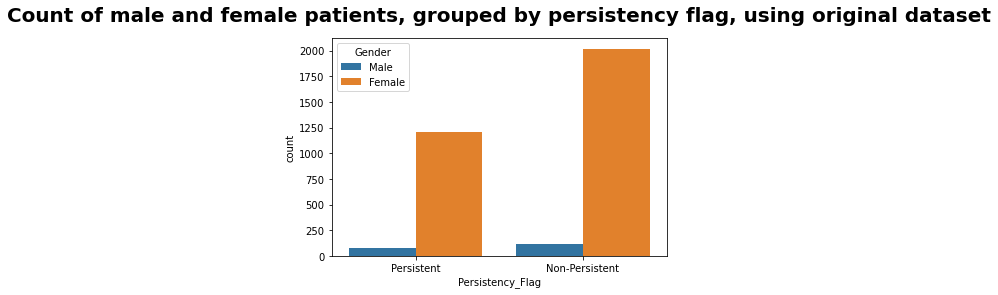

In [22]:
#df['Gender'].value_counts().plot(kind='bar')
#sns.set_theme(style="darkgrid")


Ps_Gender_plot=sns.countplot(x = 'Persistency_Flag',                                              
            hue=df['Gender'],
            data=df
            )

Ps_Gender_plot.set_title('Count of male and female patients, grouped by persistency flag, using original dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)

In [23]:
df['Persistency_Flag'].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

In [24]:
df['Gender'].value_counts()

Female    3230
Male       194
Name: Gender, dtype: int64

Let's explore race:

Text(0.5, 1.05, 'Count of races, grouped by persistency flag')

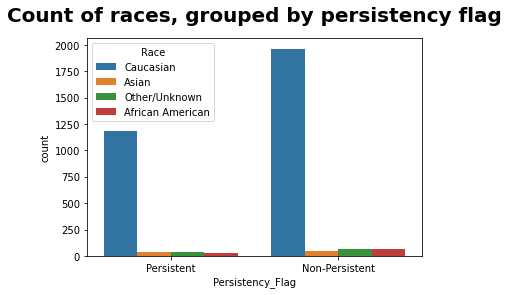

In [25]:
Ps_Race_plot=sns.countplot(x = 'Persistency_Flag',                                                
            hue=df['Race'],
            data=df
            )
Ps_Race_plot.set_title('Count of races, grouped by persistency flag', fontsize=20, fontdict={"weight": "bold"},y=1.05)

Let's explore region:

Text(0.5, 1.05, 'Count of regions, grouped by persistency flag')

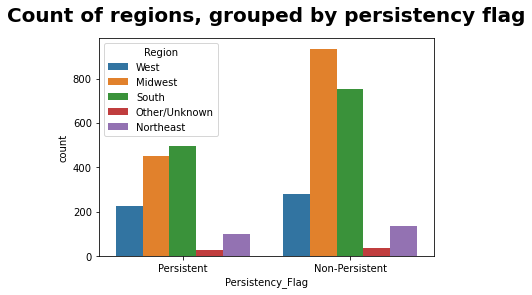

In [26]:
Ps_Region_plot=sns.countplot(x = 'Persistency_Flag',                                               
            hue=df['Region'],
            data=df
            )
Ps_Region_plot.set_title('Count of regions, grouped by persistency flag', fontsize=20, fontdict={"weight": "bold"},y=1.05)

Let's explore ethnicity:

Text(0.5, 1.05, 'Count of ethnicities, grouped by persistency flag')

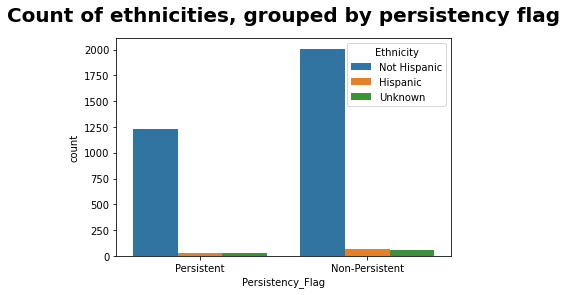

In [27]:
Ps_Ethnicity_plot=sns.countplot(x = 'Persistency_Flag',                                           
            hue='Ethnicity',
            data=df
            )
Ps_Ethnicity_plot.set_title('Count of ethnicities, grouped by persistency flag', fontsize=20, fontdict={"weight": "bold"},y=1.05)

Explore hispanic:

Text(0.5, 1.05, 'Count of hispanic and non-hispanic patients, grouped by persistency flag')

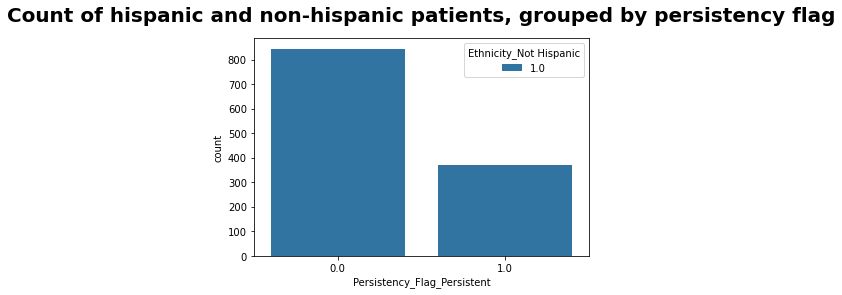

In [28]:
Ps_Hispanic_plot=sns.countplot(x = 'Persistency_Flag_Persistent',                                            
            hue='Ethnicity_Not Hispanic',
            data=df_modified
            )
Ps_Hispanic_plot.set_title('Count of hispanic and non-hispanic patients, grouped by persistency flag', fontsize=20, fontdict={"weight": "bold"},y=1.05)

Explore age:

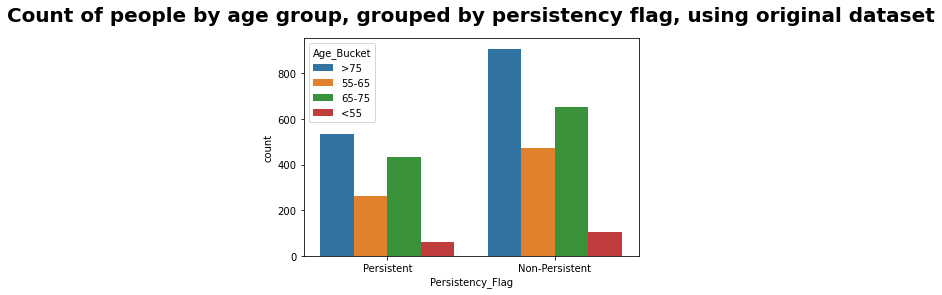

In [29]:
Ps_Age_plot=sns.countplot(x = 'Persistency_Flag',                                             
            hue='Age_Bucket',
            data=df)                  
                  

Ps_Age_plot.set_title('Count of people by age group, grouped by persistency flag, using original dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)
legend_labels, _= Ps_Race_plot.get_legend_handles_labels()


Ps_Race_plot.legend(legend_labels, ['<55', '>=55'], 
          bbox_to_anchor=(1,1), 
          title='Age_Bucket')

Let's explore frequncies of Persistency_Flag classes for each dataset:

In [30]:
df['Persistency_Flag'].value_counts()

Non-Persistent    2135
Persistent        1289
Name: Persistency_Flag, dtype: int64

In [31]:
df_modified['Persistency_Flag_Persistent'].value_counts()

0.0    844
1.0    371
Name: Persistency_Flag_Persistent, dtype: int64

In [32]:

headers=["Dataset", "Persistency_Flag","Count"]
values =[["Original", "Non-Persistent", 2135],
         ["Original", "Persistent",1289],
         ["Modified", "Non-Persistent",844],
         ["Modified", "Persistent",371]]

In [33]:
data_both=pd.DataFrame(values)

data_both

,0,1,2
0,Original,Non-Persistent,2135
1,Original,Persistent,1289
2,Modified,Non-Persistent,844
3,Modified,Persistent,371


In [34]:
data_both.columns=["Dataset", "Persistency_Flag","Count"]

In [35]:
data_both.head()

,Dataset,Persistency_Flag,Count
0,Original,Non-Persistent,2135
1,Original,Persistent,1289
2,Modified,Non-Persistent,844
3,Modified,Persistent,371


Text(0.5, 1.05, 'Count of Persistency flag classes for each dataset')

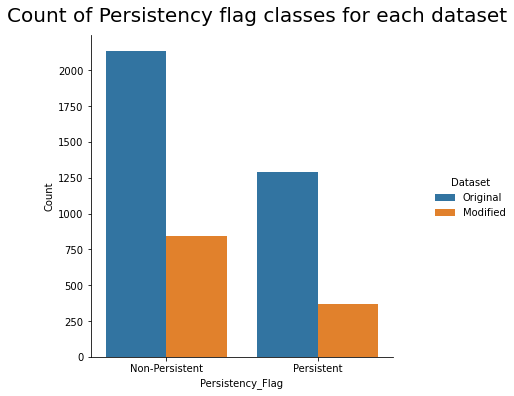

In [36]:
data_both_plot=sns.catplot(x = "Persistency_Flag",       
            y = "Count",       
            data=data_both,
            hue="Dataset",
            
            kind = "bar")

data_both_plot.fig.suptitle('Count of Persistency flag classes for each dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)



Investigate outliers from original dataset:

Text(0.5, 1.05, 'Boxplot of Count_Of_Risks, grouped by Persistency Flag, using original dataset')

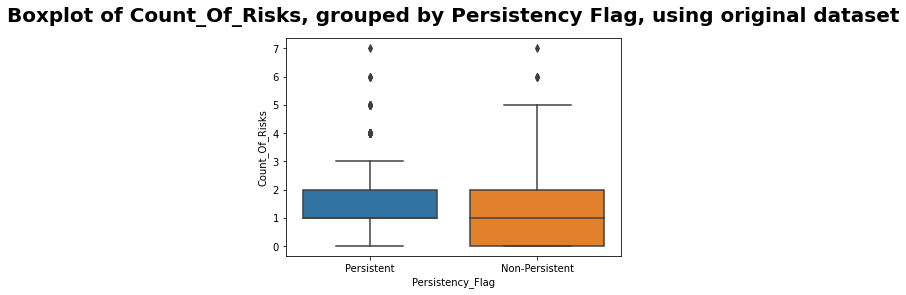

In [37]:
sns.boxplot(y=df["Count_Of_Risks"],x=df["Persistency_Flag"]).set_title('Boxplot of Count_Of_Risks, grouped by Persistency Flag, using original dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)


Text(0.5, 1.05, 'Boxplot of Dexa_Freq_During_Rx, grouped by Persistency Flag, using original dataset')

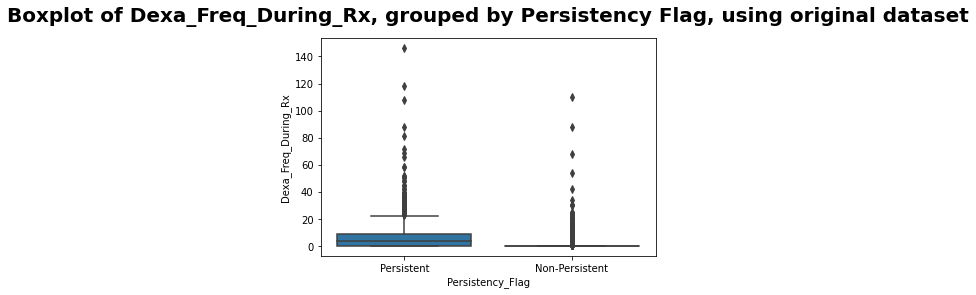

In [38]:
sns.boxplot(y=df['Dexa_Freq_During_Rx'],x=df["Persistency_Flag"]).set_title('Boxplot of Dexa_Freq_During_Rx, grouped by Persistency Flag, using original dataset', fontsize=20, fontdict={"weight": "bold"},y=1.05)

Check modified dataset for correlations:

In [39]:
labels = ["DDR","CEFSfMN","CEFM", "CEFGEWOCSORD" , "CLTCDT", "CCV", "Persistency_Flag"] # labels for axes


In [40]:
corrs=df_best.corr()

Text(0.5, 1.05, 'Correlation heatmap for dataframe of best features and target, using modified data')

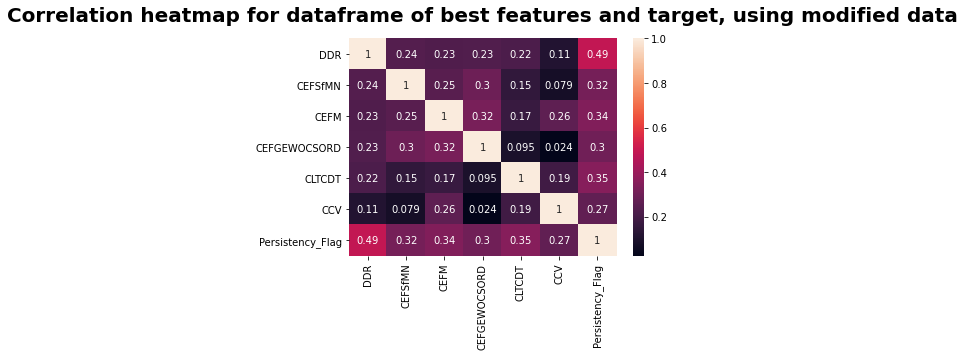

In [41]:
sns.heatmap(corrs,xticklabels=labels, yticklabels=labels, annot=True).set_title('Correlation heatmap for dataframe of best features and target, using modified data', fontsize=20, fontdict={"weight": "bold"},y=1.05)